# Accessing NCAR data origin data and benchmark

In [1]:
# Display output of plots directly in Notebook
import intake
import numpy as np
import pandas as pd
import xarray as xr
import re
import aiohttp
import time
from contextlib import contextmanager
import matplotlib.pyplot as plt
import requests
import time

In [2]:
import fsspec
import fsspec.implementations.http as fshttp
from pelicanfs.core import PelicanFileSystem, PelicanMap, OSDFFileSystem 

In [3]:
def convert_to_speed(times,size):
    return [size/x for x in times]

In [4]:
https_url_500 = 'https://data.rda.ucar.edu/d084001/2024/20241109/gfs.0p25.2024110900.f000.grib2' # ~ 500 MB
https_url = 'https://data.rda.ucar.edu/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2' # ~ 17 MB
osdf_url_500 =  'osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f000.grib2'
osdf_url = 'osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2'

In [5]:
%%timeit -r10 -n1 -o
https_file = fsspec.open(https_url)
test = https_file.open().read()

2.26 s ± 534 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 2.26 s ± 534 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)>

In [6]:
http_benchmark = _
http_benchmark.all_runs = convert_to_speed(http_benchmark.all_runs, 17)

In [8]:
%%timeit -r10 -n1 -o
https_file = fsspec.open(https_url_500)
test = https_file.open().read()

23 s ± 11.2 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 23 s ± 11.2 s per loop (mean ± std. dev. of 10 runs, 1 loop each)>

In [9]:
http_benchmark_500 = _
http_benchmark_500.all_runs = convert_to_speed(http_benchmark_500.all_runs, 500)

In [10]:
http_benchmark.all_runs

[13.864690586133662,
 7.717487157007084,
 5.844226304808398,
 8.991274817746458,
 6.754802908552583,
 6.624368112341729,
 8.064236876146186,
 5.485919119718245,
 7.1418875866103155,
 10.060624202951091]

In [11]:
%%timeit -r10 -n1 -o
osdf_file = fsspec.open(osdf_url)
test = osdf_file.open().read()

1.44 s ± 362 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 1.44 s ± 362 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)>

In [12]:
osdf_benchmark = _
osdf_benchmark.all_runs = convert_to_speed(osdf_benchmark.all_runs, 17)

In [13]:
%%timeit -r10 -n1 -o
osdf_file = fsspec.open(osdf_url_500)
test = osdf_file.open().read()

20.5 s ± 4.29 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 20.5 s ± 4.29 s per loop (mean ± std. dev. of 10 runs, 1 loop each)>

In [14]:
osdf_benchmark_500 = _
osdf_benchmark_500.all_runs = convert_to_speed(osdf_benchmark_500.all_runs, 500)

#### Do the same thing, but with new data

In [16]:
reps = 11
osdf_500_first = []
for i in range(1,reps):
    new_url = osdf_url_500.replace('f000','f'+f'{i*3}'.zfill(3))
    print(new_url)
    start = time.time()
    osdf_file = fsspec.open(new_url)
    test = osdf_file.open().read()
    end = time.time()
    osdf_500_first.append(end-start)
    print(end-start)

osdf_500_first = convert_to_speed(osdf_500_first, 500)

osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f003.grib2
43.416706800460815
osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f006.grib2
46.3556911945343
osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f009.grib2
36.32691025733948
osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f012.grib2
40.33690285682678
osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f015.grib2
31.145659923553467
osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f018.grib2
24.366804838180542
osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f021.grib2
18.750062227249146
osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f024.grib2
19.145925045013428
osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f027.grib2
20.25401520729065
osdf:///ncar/rda/d084001/2024/20241109/gfs.0p25.2024110900.f030.grib2
19.105170965194702


In [17]:
reps = 12
osdf_20_first = []
for i in range(2,reps):
    new_url = osdf_url.replace('20160101','201601'+f'{i}'.zfill(2))
    print(new_url)
    start = time.time()
    osdf_file = fsspec.open(new_url)
    #test = osdf_file.open().read()
    end = time.time()
    osdf_20_first.append(end-start)

osdf_20_first = convert_to_speed(osdf_20_first, 17)

osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2
osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2
osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2
osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2
osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2
osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2
osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2
osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2
osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2
osdf:///ncar/rda/d083002/grib2/2016/2016.01/fnl_20160102_00_00.grib2


In [ ]:
ds_osdf_1Mb  = ds_osdf.isel(time=0).isel(member_id =1+ np.arange(3))
ds_https_1Mb = ds_https.isel(time=0).isel(member_id =1+ np.arange(3))
ds_osdf_1Mb

In [ ]:
ds_osdf_10Mb  = ds_osdf.isel(member_id =4).isel(time=np.arange(24))
ds_https_10Mb = ds_https.isel(member_id =4).isel(time=np.arange(24))
ds_osdf_10Mb

In [ ]:
ds_osdf_100Mb  = ds_osdf.isel(member_id =5).isel(time=np.arange(238))
ds_https_100Mb = ds_https.isel(member_id =5).isel(time=np.arange(238))
ds_osdf_100Mb

In [ ]:
ds_osdf_1Gb  = ds_osdf.isel(member_id  = 6 + np.arange(6)).isel(time = np.arange(410))
ds_https_1Gb = ds_https.isel(member_id = 6 + np.arange(6)).isel(time = np.arange(410))
ds_osdf_1Gb

In [ ]:
ds_osdf_10Gb  = ds_osdf.isel(member_id  = 12 + np.arange(52))
ds_https_10Gb = ds_https.isel(member_id = 12 + np.arange(52))
ds_osdf_10Gb

## Plot Benchmark

/var/folders/s6/91vtlny15ndg8d653_5yj3d54s47g_/T/ipykernel_24500/3617907460.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['HTTPS 20 MB','OSDF 20 MB - Cached', 'OSDF 20 MB - First Run'])


[]

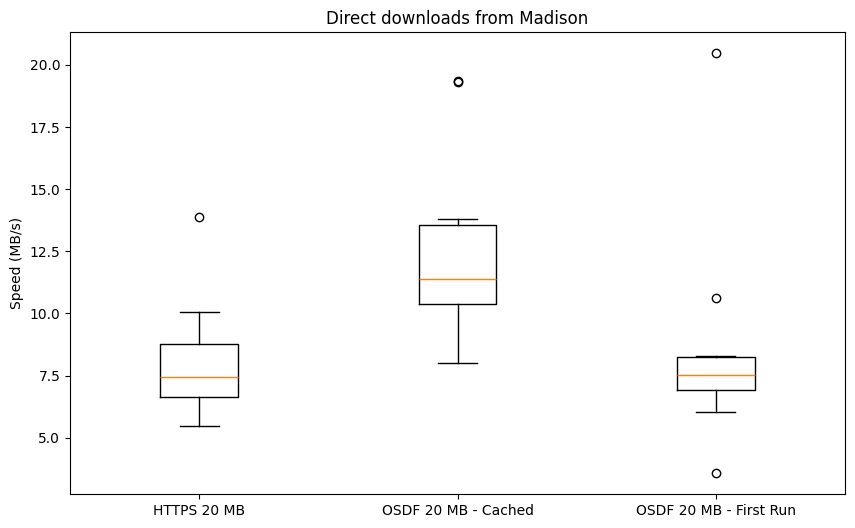

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Direct downloads from Madison")
ax.set_xticklabels(['HTTPS 20 MB','OSDF 20 MB - Cached', 'OSDF 20 MB - First Run'])
ax.set_ylabel('Speed (MB/s)')
ax.boxplot([http_benchmark.all_runs,osdf_benchmark.all_runs,osdf_20_first])
ax.plot()


In [24]:
fig.savefig('test.png')

/var/folders/s6/91vtlny15ndg8d653_5yj3d54s47g_/T/ipykernel_24500/2032745465.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['HTTPS 500 MB','OSDF 500 MB - Cached','OSDF 500 MB - First Try'])


[]

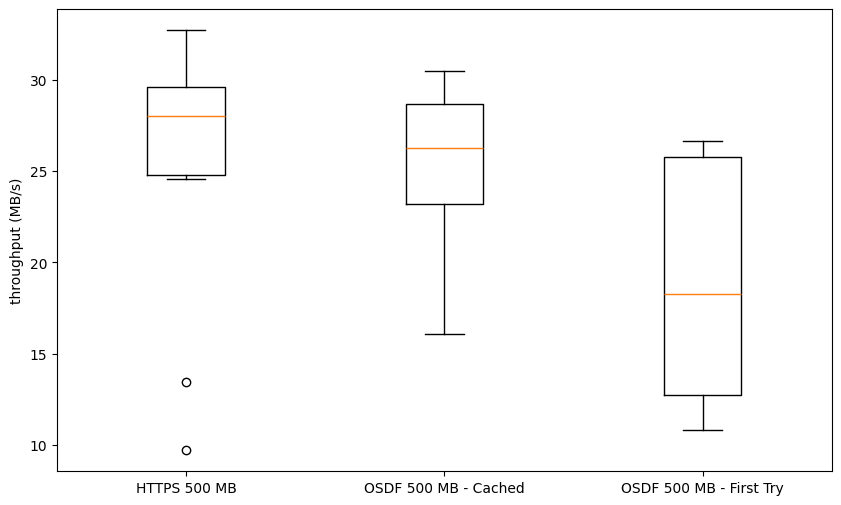

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xticklabels(['HTTPS 500 MB','OSDF 500 MB - Cached','OSDF 500 MB - First Try'])
ax.set_ylabel('Speed (MB/s)')
ax.set_title("Direct downloads from Madison")
ax.boxplot([http_benchmark_500.all_runs,osdf_benchmark_500.all_runs,osdf_500_first])
ax.plot()


In [20]:
http_benchmark_500.all_runs

[13.416349938727265,
 9.6952453944973,
 29.545437088672035,
 24.553432234069625,
 28.207432825731722,
 29.84377372437392,
 32.72366319513727,
 25.386109128117045,
 29.647175384951844,
 27.80469570913068]